In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar  6 16:15:00 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P3    13W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

from nlp import preprocessing as pp
# import cleaning_nlp as cc
print("imported successfully")

imported successfully


In [3]:
path_train = 'data/one_stop_train.csv'
path_test = 'data/one_stop_test.csv'
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)


In [4]:
df_train

,index,documents,doc_list,avg_num_words,total_num_sents,total_num_words,words_per_sents,level,doc_id
0,0,SeaWorld's profits fell by 84% and customers a...,['SeaWorld’s profits fell by 84% and customers...,25.00,1,25,[25],Ele,0
1,1,The company teaches dolphins and killer whales...,['The company teaches dolphins and killer whal...,17.00,1,17,[17],Ele,0
2,2,It says fewer people are going to its parks an...,['It says fewer people are going to its parks ...,13.00,1,13,[13],Ele,0
3,3,SeaWorld has been in the news since the 2013 d...,['SeaWorld has been in the news since the 2013...,33.00,1,33,[33],Ele,0
4,4,Animal rights organizations say that orcas kep...,['Animal rights organizations say that orcas k...,14.00,2,28,"[17, 11]",Ele,0
...,...,...,...,...,...,...,...,...,...
6545,7390,One major problem is complicity between senior...,['One major problem is complicity between seni...,26.00,3,78,"[15, 32, 31]",Adv,566
6546,7391,As the number of tigers has increased over the...,['As the number of tigers has increased over t...,19.25,4,77,"[17, 21, 14, 25]",Adv,566
6547,7392,Wildlife authorities captured a tiger in Chitw...,['Wildlife authorities captured a tiger in Chi...,19.00,4,76,"[23, 12, 14, 27]",Adv,566
6548,7393,"Diwakar Chapagain, who heads a World Wildlife ...","['Diwakar Chapagain, who heads a World Wildlif...",30.00,1,30,[30],Adv,566


In [5]:
d_train = df_train[['documents', 'level']]
d_test = df_test[['documents', 'level']]

In [6]:
d_train.shape, d_test.shape

((6550, 2), (845, 2))

In [7]:
sentence_data_train = pp.get_sentences_dataframe(d_train, 'documents', 'level')
sentence_data_test = pp.get_sentences_dataframe(d_test, 'documents', 'level')

In [8]:
df_processed_train = pp.preprocess_all(sentence_data_train, 'documents', stop_words=True)
df_processed_test = pp.preprocess_all(sentence_data_test, 'documents', stop_words=True)

In [9]:
df_processed_train.dtypes

documents          object
num_of_words        int64
level              object
doc_id              int64
documents_clean    object
Lemmatized         object
Stemmed            object
dtype: object

In [11]:
df_processed_test

,documents,num_of_words,level,doc_id,documents_clean,Lemmatized,Stemmed
0,Police and intelligence agencies around the wo...,24,Ele,0,police intelligence agencies around world almo...,police intelligence agency around world almost...,polic intellig agenc around world almostyear u...
1,"But, now, researchers in Britain and the Nethe...",23,Ele,1,researchers britain netherlands developed new ...,researcher britain netherlands developed new m...,research britain netherland develop new method...
2,Police stations around the world might begin u...,14,Ele,1,police stations around world might begin using...,police station around world might begin using ...,polic station around world might begin use new...
3,"It doesn't monitor movements in the face, talk...",20,Ele,1,monitor movements face talking much waving arm...,monitor movement face talking much waving arm ...,monitor movement face talk much wave arm sign ...
4,The new method monitors movements in the whole...,18,Ele,1,new method monitors movements whole body show ...,new method monitor movement whole body show pe...,new method monitor movement whole bodi show pe...
...,...,...,...,...,...,...,...
2230,If this whole thing is giving you the heebie-j...,41,Adv,843,whole thing giving recall last time cheek jowl...,whole thing giving recall last time cheek jowl...,whole thing give recal last time cheek jowl ev...
2231,Many cleansing- reduction enthusiasts still us...,50,Adv,843,many cleansing reduction enthusiasts still use...,many cleansing reduction enthusiast still use ...,mani cleans reduct enthusiast still use deodor...
2232,"You don't need to go cold turkey, as Hamblin d...",29,Adv,844,need go cold turkey hamblin disinfecting sessi...,need go cold turkey hamblin disinfecting sessi...,need go cold turkey hamblin disinfect session ...
2233,Reduce.,1,Adv,844,reduce,reduce,reduc


In [12]:
df_processed_train.level.value_counts()

Adv    6431
Int    6109
Ele    5183
Name: level, dtype: int64

In [13]:
data_train = df_processed_train[['Lemmatized', 'level']]
data_test = df_processed_test[['Lemmatized', 'level']]

In [14]:
r = max(data_train.Lemmatized.values.tolist())
len(r)

88

In [15]:
s = [sen for sen in data_train.Lemmatized.values.tolist()]


In [16]:
ws = [words for sen in data_train.Lemmatized.values.tolist() for words in sen.split()]
wl = [len(word) for word in ws]
max(wl)

40

In [17]:
# df
sl = [len(sen.split()) for sen in data_train.Lemmatized.values.tolist()]
sum(s for s in sl)/len(sl)

9.865203408000903

In [18]:
# sorted(sl)[::-1]

In [19]:
w = [word for words in data_train.Lemmatized.values.tolist() for word in words.split() ]

In [20]:
len(set(w))

13694

In [21]:
y_integers = []
for level in data_train.level:
  if level == 'Ele':
    y_integers.append(0)
  elif level == 'Int':
    y_integers.append(1)
  else:
    y_integers.append(2)
data_train['level'] = y_integers

y_integers = []
for level in data_test.level:
  if level == 'Ele':
    y_integers.append(0)
  elif level == 'Int':
    y_integers.append(1)
  else:
    y_integers.append(2)
data_test['level'] = y_integers

C:\Users\ravis\AppData\Local\Temp\ipykernel_3128\3915287228.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['level'] = y_integers
C:\Users\ravis\AppData\Local\Temp\ipykernel_3128\3915287228.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['level'] = y_integers


In [22]:
data_train.groupby('level').count()

,Lemmatized
level,
0,5183
1,6109
2,6431


In [23]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, LSTM, Reshape, Embedding, TextVectorization,Bidirectional,concatenate,Flatten

In [24]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 8000
# Max number of words in each sentence.
MAX_SEQUENCE_LENGTH = 40
# This is fixed for LSTM layer.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_train['Lemmatized'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 13694 unique tokens.


In [25]:
X = tokenizer.texts_to_sequences(data_train['Lemmatized'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (17723, 40)


In [26]:
X_test = tokenizer.texts_to_sequences(data_test['Lemmatized'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)


In [27]:
y = to_categorical(data_train['level'].values)
y_test = to_categorical(data_test['level'].values)

In [28]:
#tf.device('/device:GPU:0')

In [29]:
len(tokenizer.word_index)

13694

### glove embeddings(need to try)!!!!!

In [30]:
import numpy as np
from os.path import abspath

def load_glove(word_index, max_features, embedding_dim=300):
    EMBEDDING_FILE = '../Embeddings/glove.840B.300d.txt'

    def get_coefs(word, *arr):
        return word, np.asarray(arr, dtype='float32')[:embedding_dim]

    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

    all_embs = np.stack(embeddings_index.values())
    emb_mean, emb_std = all_embs.mean(), all_embs.std()

    embedding_matrix = np.random.normal(emb_mean, emb_std, (max_features, embedding_dim))
    
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        else:
            embedding_vector = embeddings_index.get(word.capitalize())
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    return embedding_matrix

# Assuming you have defined MAX_NB_WORDS and EMBEDDING_DIM
MAX_NB_WORDS = 8000  # Define based on your requirements
EMBEDDING_DIM = 300  # Adjust based on the dimension of GloVe embeddings you are using

# Assuming you have defined tokenizer
max_features = min(MAX_NB_WORDS, len(tokenizer.word_index) + 1)
embedding_matrix = load_glove(tokenizer.word_index, max_features)

# Now you can use the embedding_matrix in your model


c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3505: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
len(embedding_matrix)

8000

In [32]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1], weights=[embedding_matrix], trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
#model.add(Bidirectional(LSTM(128,return_sequences=True,go_backwards=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(128,return_sequences=True,go_backwards=True)))
model.add(Bidirectional(LSTM(512, return_sequences=False)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10 #need to try for 100
batch_size = 256
# epochs = 1
# batch_size = 512
with tf.device('/device:GPU:0'):

    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='loss', patience=3, min_delta=0.0001,verbose=1)])


Epoch 1/10
70/70 [==============================] - 24s 121ms/step - loss: 1.0769 - accuracy: 0.3850 - val_loss: 1.0812 - val_accuracy: 0.4112
Epoch 2/10
70/70 [==============================] - 5s 76ms/step - loss: 1.0473 - accuracy: 0.4298 - val_loss: 1.0911 - val_accuracy: 0.4286
Epoch 3/10
70/70 [==============================] - 5s 77ms/step - loss: 1.0329 - accuracy: 0.4517 - val_loss: 1.1006 - val_accuracy: 0.3848
Epoch 4/10
70/70 [==============================] - 5s 77ms/step - loss: 1.0153 - accuracy: 0.4700 - val_loss: 1.1061 - val_accuracy: 0.3973
Epoch 5/10
70/70 [==============================] - 5s 78ms/step - loss: 0.9943 - accuracy: 0.4803 - val_loss: 1.0727 - val_accuracy: 0.3843
Epoch 6/10
70/70 [==============================] - 6s 79ms/step - loss: 0.9735 - accuracy: 0.4987 - val_loss: 1.0898 - val_accuracy: 0.3817
Epoch 7/10
70/70 [==============================] - 5s 77ms/step - loss: 0.9625 - accuracy: 0.5025 - val_loss: 1.0575 - val_accuracy: 0.4242
Epoch 8/10


In [33]:
_, train_acc = model.evaluate(X, y, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

70/70 [==============================] - 1s 19ms/step - loss: 1.0911 - accuracy: 0.3866
Train: 0.553, Test: 0.387


In [34]:
accr = model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

70/70 [==============================] - 1s 19ms/step - loss: 1.0911 - accuracy: 0.3866
Test set
  Loss: 1.091
  Accuracy: 0.387


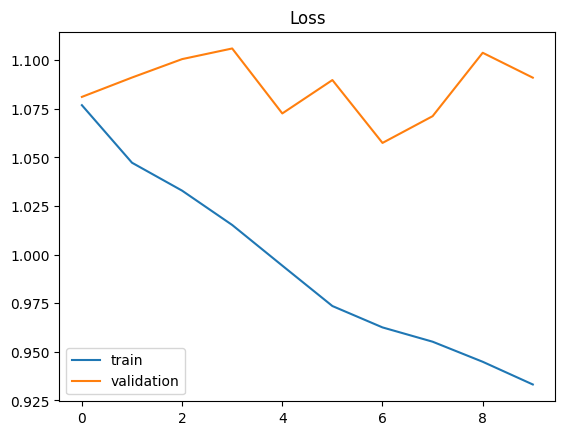

In [35]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

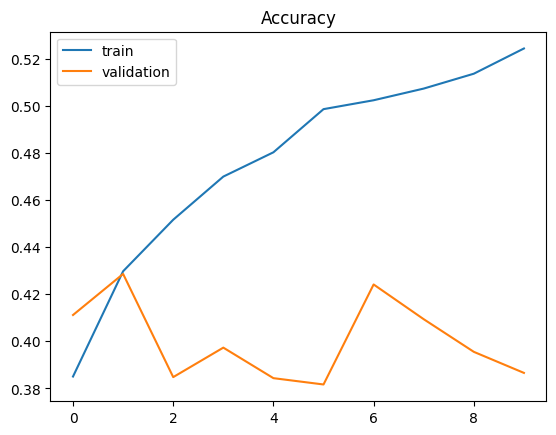

In [36]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [37]:
model.layers